<a href="https://colab.research.google.com/github/stepan-ha/Labs/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм розрахунку індивідуальних вхідних даних

---

Встановіть значення змінної variant: сума номера групи помноженого на 25 і
порядкового номеру студента в списку групи (групі ПМОм-11 відповідає номер
0, групі ПМІм-11 відповідає номер 1, групі ПМІм-12 відповідає номер 2, групі
ПМІм-13 відповідає номер 3). Далі встановіть set.seed(variant) та згенеруйте
значення змінної redundant як заокруглене до цілого (для заокруглення можна
використати функції floor або round) випадкове число з рівномірного на інтервалі
(номер групи + 5, 25 – номер групи) розподілу (функція runif).


In [22]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Завдання 1

---

 Модифікуйте дані Auto наступним чином: встановивши seed, що дорівнює
значенню змінної variant, видаліть redundant % спостережень з допомогою
функції sample. Побудуйте просту лінійну регресію з залежною змінною mpg і
незалежною – weight. Виведіть та прокоментуйте результати з допомогою
summary(). Зобразіть графічно предиктор та залежну змінну. Використовуючи
функцію plot(), прокоментуйте які ви бачите проблеми.

In [23]:
group_number = 2

student_number = 5

variant = group_number * 25 + student_number
print(f"Мій номер індивідуального завдання: {variant}")

random.seed(variant)

redundant = math.floor(random.uniform(group_number + 5, 25 - group_number))
print(f"Redundant: {redundant}%")

df = sns.load_dataset('mpg').dropna()

print(df.head())

Auto_new = df.drop(df.sample(frac=redundant / 100, random_state=variant).index)

print(f"Початковий розмір: {df.shape}")
print(f"Новий розмір: {Auto_new.shape}")

Мій номер індивідуального завдання: 55
Redundant: 8%
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
Початковий розмір: (392, 9)
Новий розмір: (361, 9)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     791.6
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           8.08e-93
Time:                        12:56:46   Log-Likelihood:                -1035.9
No. Observations:                 361   AIC:                             2076.
Df Residuals:                     359   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6615      0.825     55.379      0.0

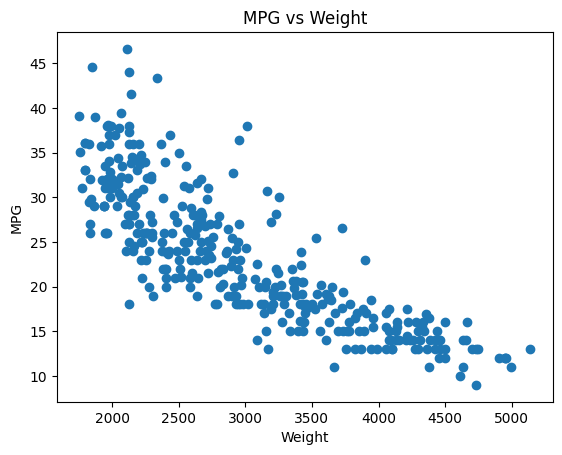

In [25]:
X = sm.add_constant(Auto_new['weight'])
y = Auto_new['mpg']

model = sm.OLS(y, X).fit()
print(model.summary())

plt.scatter(Auto_new['weight'], Auto_new['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')
plt.show()

# Завдання 2

---

 Модифікуйте дані Carseats, аналогічно до завдання 1. Побудуйте модель
множинної регресії для прогнозування Sales використовуючи Price, Urban, та US.
Яку зі змінних можна вилучити з моделі? Побудуйте модель, яка використовує
лише ті предиктори, для яких зв’язок з залежною змінною є істотним. Дослідіть
отриману модель на наявність викидів та спостережень з високим рівнем
левереджу.

In [26]:


df2 = sm.datasets.get_rdataset('Carseats', 'ISLR').data

print(df2.columns)

CaeSeats_new = df2.drop(df2.sample(frac=redundant / 100, random_state=variant).index)

print(f"Початковий розмір: {df2.shape}")
print(f"Новий розмір: {CaeSeats_new.shape}")

CaeSeats_new['Urban'] = CaeSeats_new['Urban'].astype('category')
CaeSeats_new['US'] = CaeSeats_new['US'].astype('category')

X = CaeSeats_new[['Price', 'Urban', 'US']]
X = pd.get_dummies(X, drop_first=True)

y = CaeSeats_new['Sales']

X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')
Початковий розмір: (400, 11)
Новий розмір: (368, 11)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     40.29
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.66e-22
Time:                        12:56:49   Log-Likelihood:                -851.10
No. Observations:                 368   AIC:                             1710.
Df Residuals:                     364   BIC:                             1726.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
  

# Яку зі змінних можна вилучити з моделі?
---

x2(Urban) бо P>|t| = 0.980, це означає, що змінна Urban не є статистично значущою і її можна вилучити з моделі


# Завдання 3

---
Виконайте наступні команди в R:

* set .seed (variant)
* x1=runif (100)
* x2 =(variant/2)* x1+rnorm (100) *variant/10
* y=(2*variant)+variant* x1 +(variant/3)* x2+rnorm (100)


Яка кореляція між x1 та x2? Оцініть регресію методом найменших квадратів, щоб
передбачити y, використовуючи x1 та x2. Чи можна відхилити нульову гіпотезу
H0: β1 = 0? Як щодо гіпотези H0: β2 = 0? Побудуйте регресію y на x1. Чи можна
відхилити нульову гіпотезу H0: β1 = 0? Побудуйте регресію y на x2. Чи можна
відхилити нульову гіпотезу H0: β2 = 0? Поясніть отримані результати.
Нехай одне додаткове спостереження було неправильно виміряно.

In [27]:

np.random.seed(variant)

x1 = np.random.uniform(size=100)
x2 = (variant / 2) * x1 + np.random.randn(100) * variant / 10
y = 2 * variant + variant * x1 + (variant / 3) * x2 + np.random.randn(100)

correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Кореляція між X1 та X2: {correlation}")

X = np.column_stack((x1, x2))
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


Кореляція між X1 та X2: 0.7412773555470475
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.216e+06
Date:                Sat, 05 Oct 2024   Prob (F-statistic):          1.01e-226
Time:                        12:56:52   Log-Likelihood:                -131.59
No. Observations:                 100   AIC:                             269.2
Df Residuals:                      97   BIC:                             277.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

Яка кореляція між x1 та x2? Кореляція між x1 nf x2 дорівнює 0.7412773555470475, це означає що присутній сильний позитивний зв'язок.

Чи можна відхилити нульову гіпотезу H0: β1 = 0?  так бо P>|t| = 0.00, що означає те що змінна x1 є статистично значущою
Як щодо гіпотези H0: β2 = 0? так бо P>|t| = 0.05, що означає те що змінна x2 є статистично значущою

# Регресія y на x1 та y на x2

Побудуйте регресію y на x1. Чи можна відхилити нульову гіпотезу H0: β1 = 0? Побудуйте регресію y на x2. Чи можна відхилити нульову гіпотезу H0: β2 = 0? Поясніть отримані результати. Нехай одне додаткове спостереження було неправильно виміряно.

In [28]:
model_x1 = sm.OLS(y, sm.add_constant(x1)).fit()
print(model_x1.summary())

model_x2 = sm.OLS(y, sm.add_constant(x2)).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.81e-21
Time:                        12:56:55   Log-Likelihood:                -621.65
No. Observations:                 100   AIC:                             1247.
Df Residuals:                      98   BIC:                             1253.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.3747     24.792      5.138      0.0

# Поясніть отримані результати. Нехай одне додаткове спостереження було неправильно виміряно.


---



Так 2 гіпотези можна відхилити через те що як у випадку із x1 так і у випадку x2 P>|t| = 0.00 і це означає що змінні є статистично значущими

# Виконайте наступні команди в R:


---



* x1 = c (x1, 0.1)
* x2 = c (x2, (variant/2)* 0.9)
* y = c (y, 5*variant)

Переоцініть попередні лінійні моделі, використовуючи ці нові дані. Дослідіть
отриману модель на наявність викидів та спостережень з високим рівнем
левереджу.

In [29]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, (variant / 2) * 0.9)
y = np.append(y, 5 * variant)

X_new = np.column_stack((x1, x2))
X_new = sm.add_constant(X_new)
model_new = sm.OLS(y, X_new).fit()
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2350.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.56e-83
Time:                        12:56:58   Log-Likelihood:                -477.92
No. Observations:                 101   AIC:                             961.8
Df Residuals:                      98   BIC:                             969.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.0161      5.604     18.203      0.0